In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [21]:
df = pd.read_csv('AB_NYC_2019.csv')
df.shape


(48895, 16)

In [110]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [111]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [112]:
#id: A unique identifier for each Airbnb listing.
#name: The name or title of the Airbnb listing.
#host_id: A unique identifier for the host of the Airbnb listing.
#host_name: The name of the host of the Airbnb listing.
#neighbourhood_group: The borough (i.e. neighborhood group) in which the Airbnb listing is located.
#neighbourhood: The specific neighborhood in which the Airbnb listing is located.
#latitude: The latitude coordinate of the Airbnb listing's location.
#longitude: The longitude coordinate of the Airbnb listing's location.
#room_type: The type of room or space that is being rented (e.g. Entire home/apt, Private room, Shared room).
#price: The nightly price for the Airbnb listing.
#minimum_nights: The minimum number of nights that a renter must stay in the Airbnb listing.
#number_of_reviews: The number of reviews that the Airbnb listing has received.
#last_review: The date of the most recent review of the Airbnb listing.
#reviews_per_month: The average number of reviews per month for the Airbnb listing.
#calculated_host_listings_count: The number of listings that the host has on Airbnb.
#availability_365: The number of days that the Airbnb listing is available for rent during the next 365 days.

<Axes: >

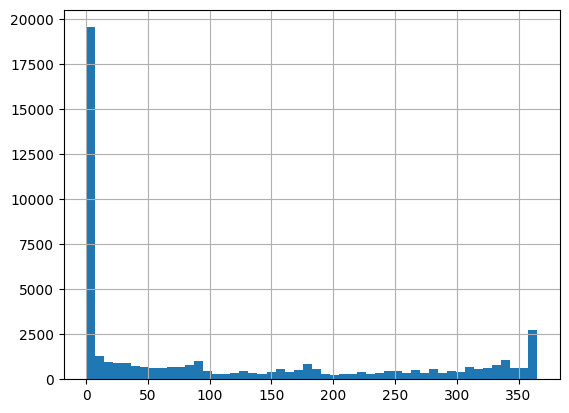

In [113]:
df['availability_365'].hist(bins=50)

In [114]:
#summarize of null cells:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# We can see null values are in the columns that are not important for our analysis
# We delete these columns
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


In [117]:
# Check for outliers
print(df.describe())

            host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582         

In [118]:
# Explore the 'neighbourhood_group' column
print(df['neighbourhood_group'].value_counts())

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


<Axes: >

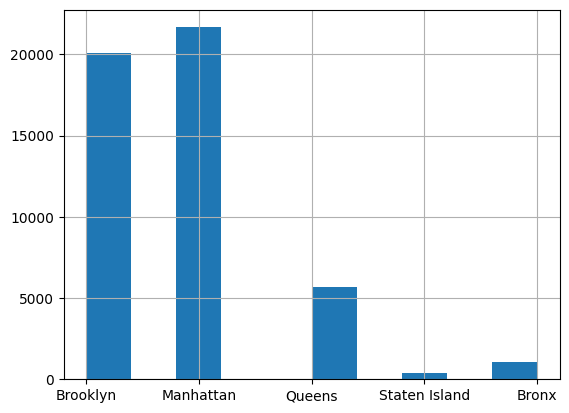

In [119]:
df['neighbourhood_group'].hist()

In [120]:
# create an instance of LabelEncoder
#le = LabelEncoder()
# fit and transform the string column to numerical values
#df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])

In [121]:
# Explore the 'neighbourhood' column
print(df['neighbourhood'].value_counts())

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


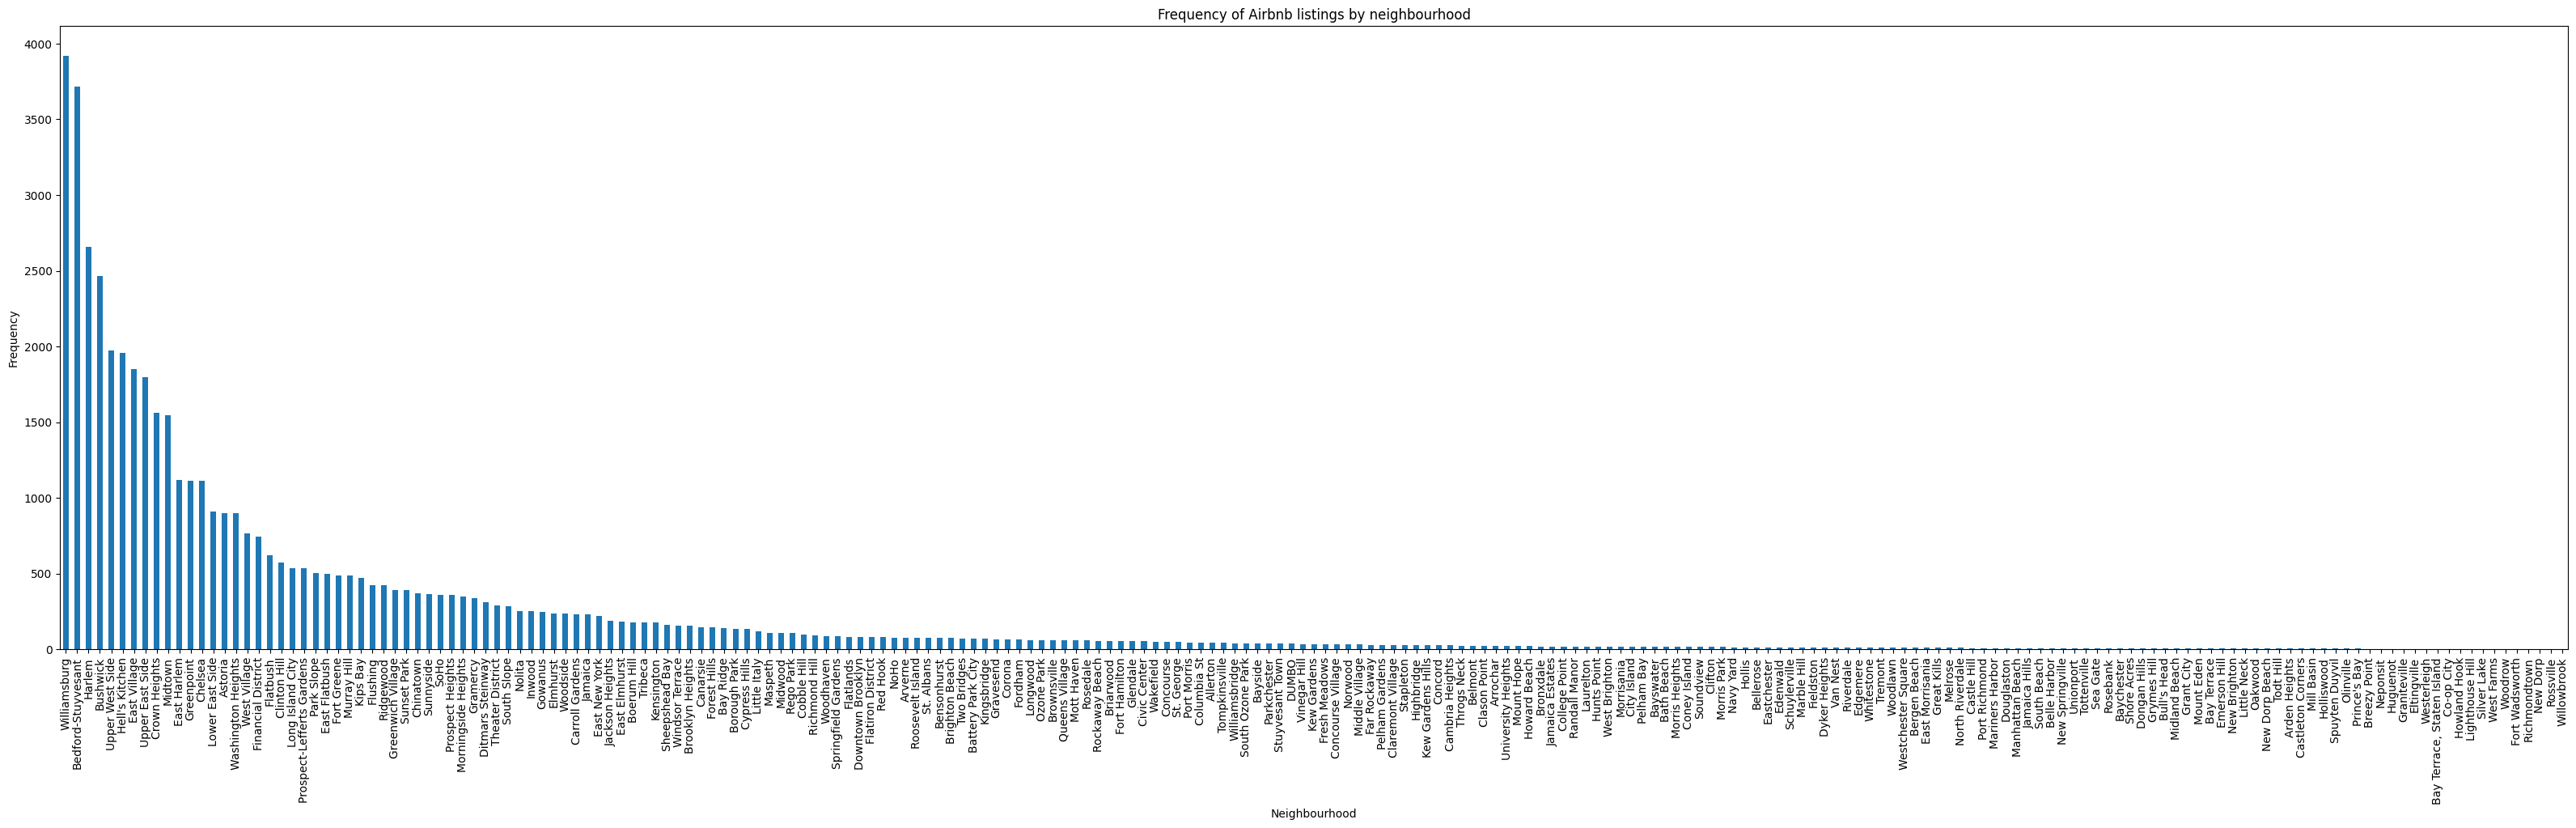

In [122]:
counts = df["neighbourhood"].value_counts()


plt.figure(figsize=(40,10))
counts.plot.bar()

plt.title("Frequency of Airbnb listings by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Frequency")

plt.show()

In [123]:

# Explore the 'room_type' column
print(df['room_type'].value_counts())

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [124]:
# Explore the 'price' column
print(df['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Zero values for price sound weird we should check the reason

In [125]:
df[df['price'] == 0].shape

(11, 12)

We try to print them to see what is happening:

In [126]:
df[df['price'] == 0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,1,0
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


Seems these records are not valid

In [127]:
print(df['minimum_nights'].describe())

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [128]:
# Explore the 'availability_365' column
print(df['availability_365'].describe())

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


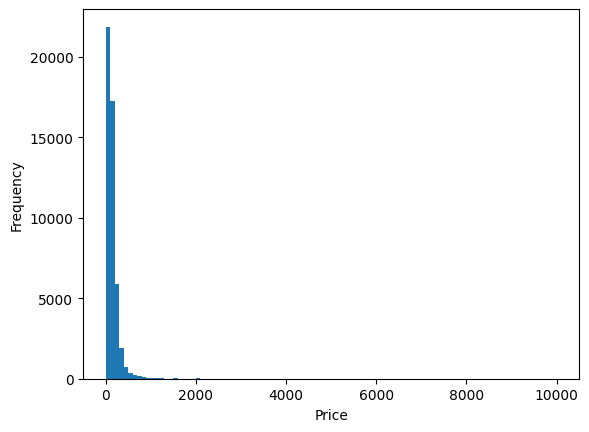

In [129]:
import seaborn as sns

# Plot a histogram of the 'price' column
plt.hist(df['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


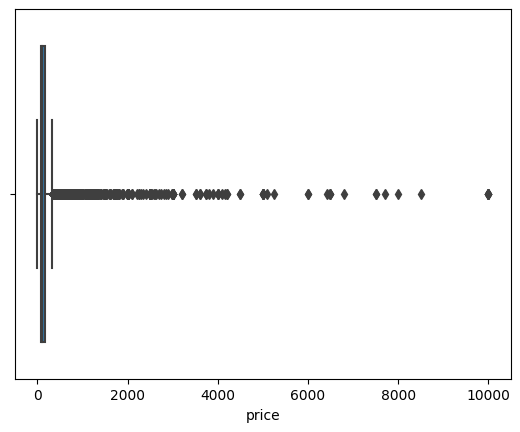

In [130]:
sns.boxplot(x=df['price'])
plt.show()

C:\Users\panaham\AppData\Local\Temp\ipykernel_12048\2587404649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


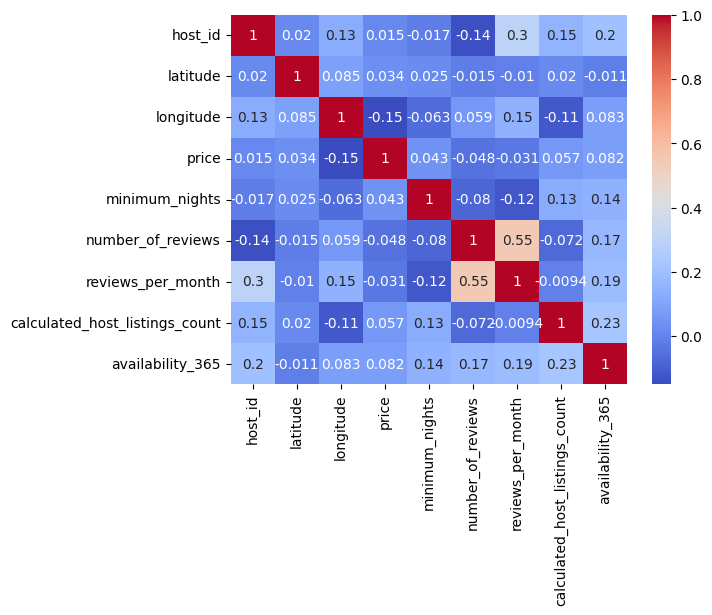

In [131]:
# Plot a heatmap of the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Based on correlation matrix there is a revesed correlation between logitude and price. review per month and number of reviews are correlated with each other so we can use consider one of them.

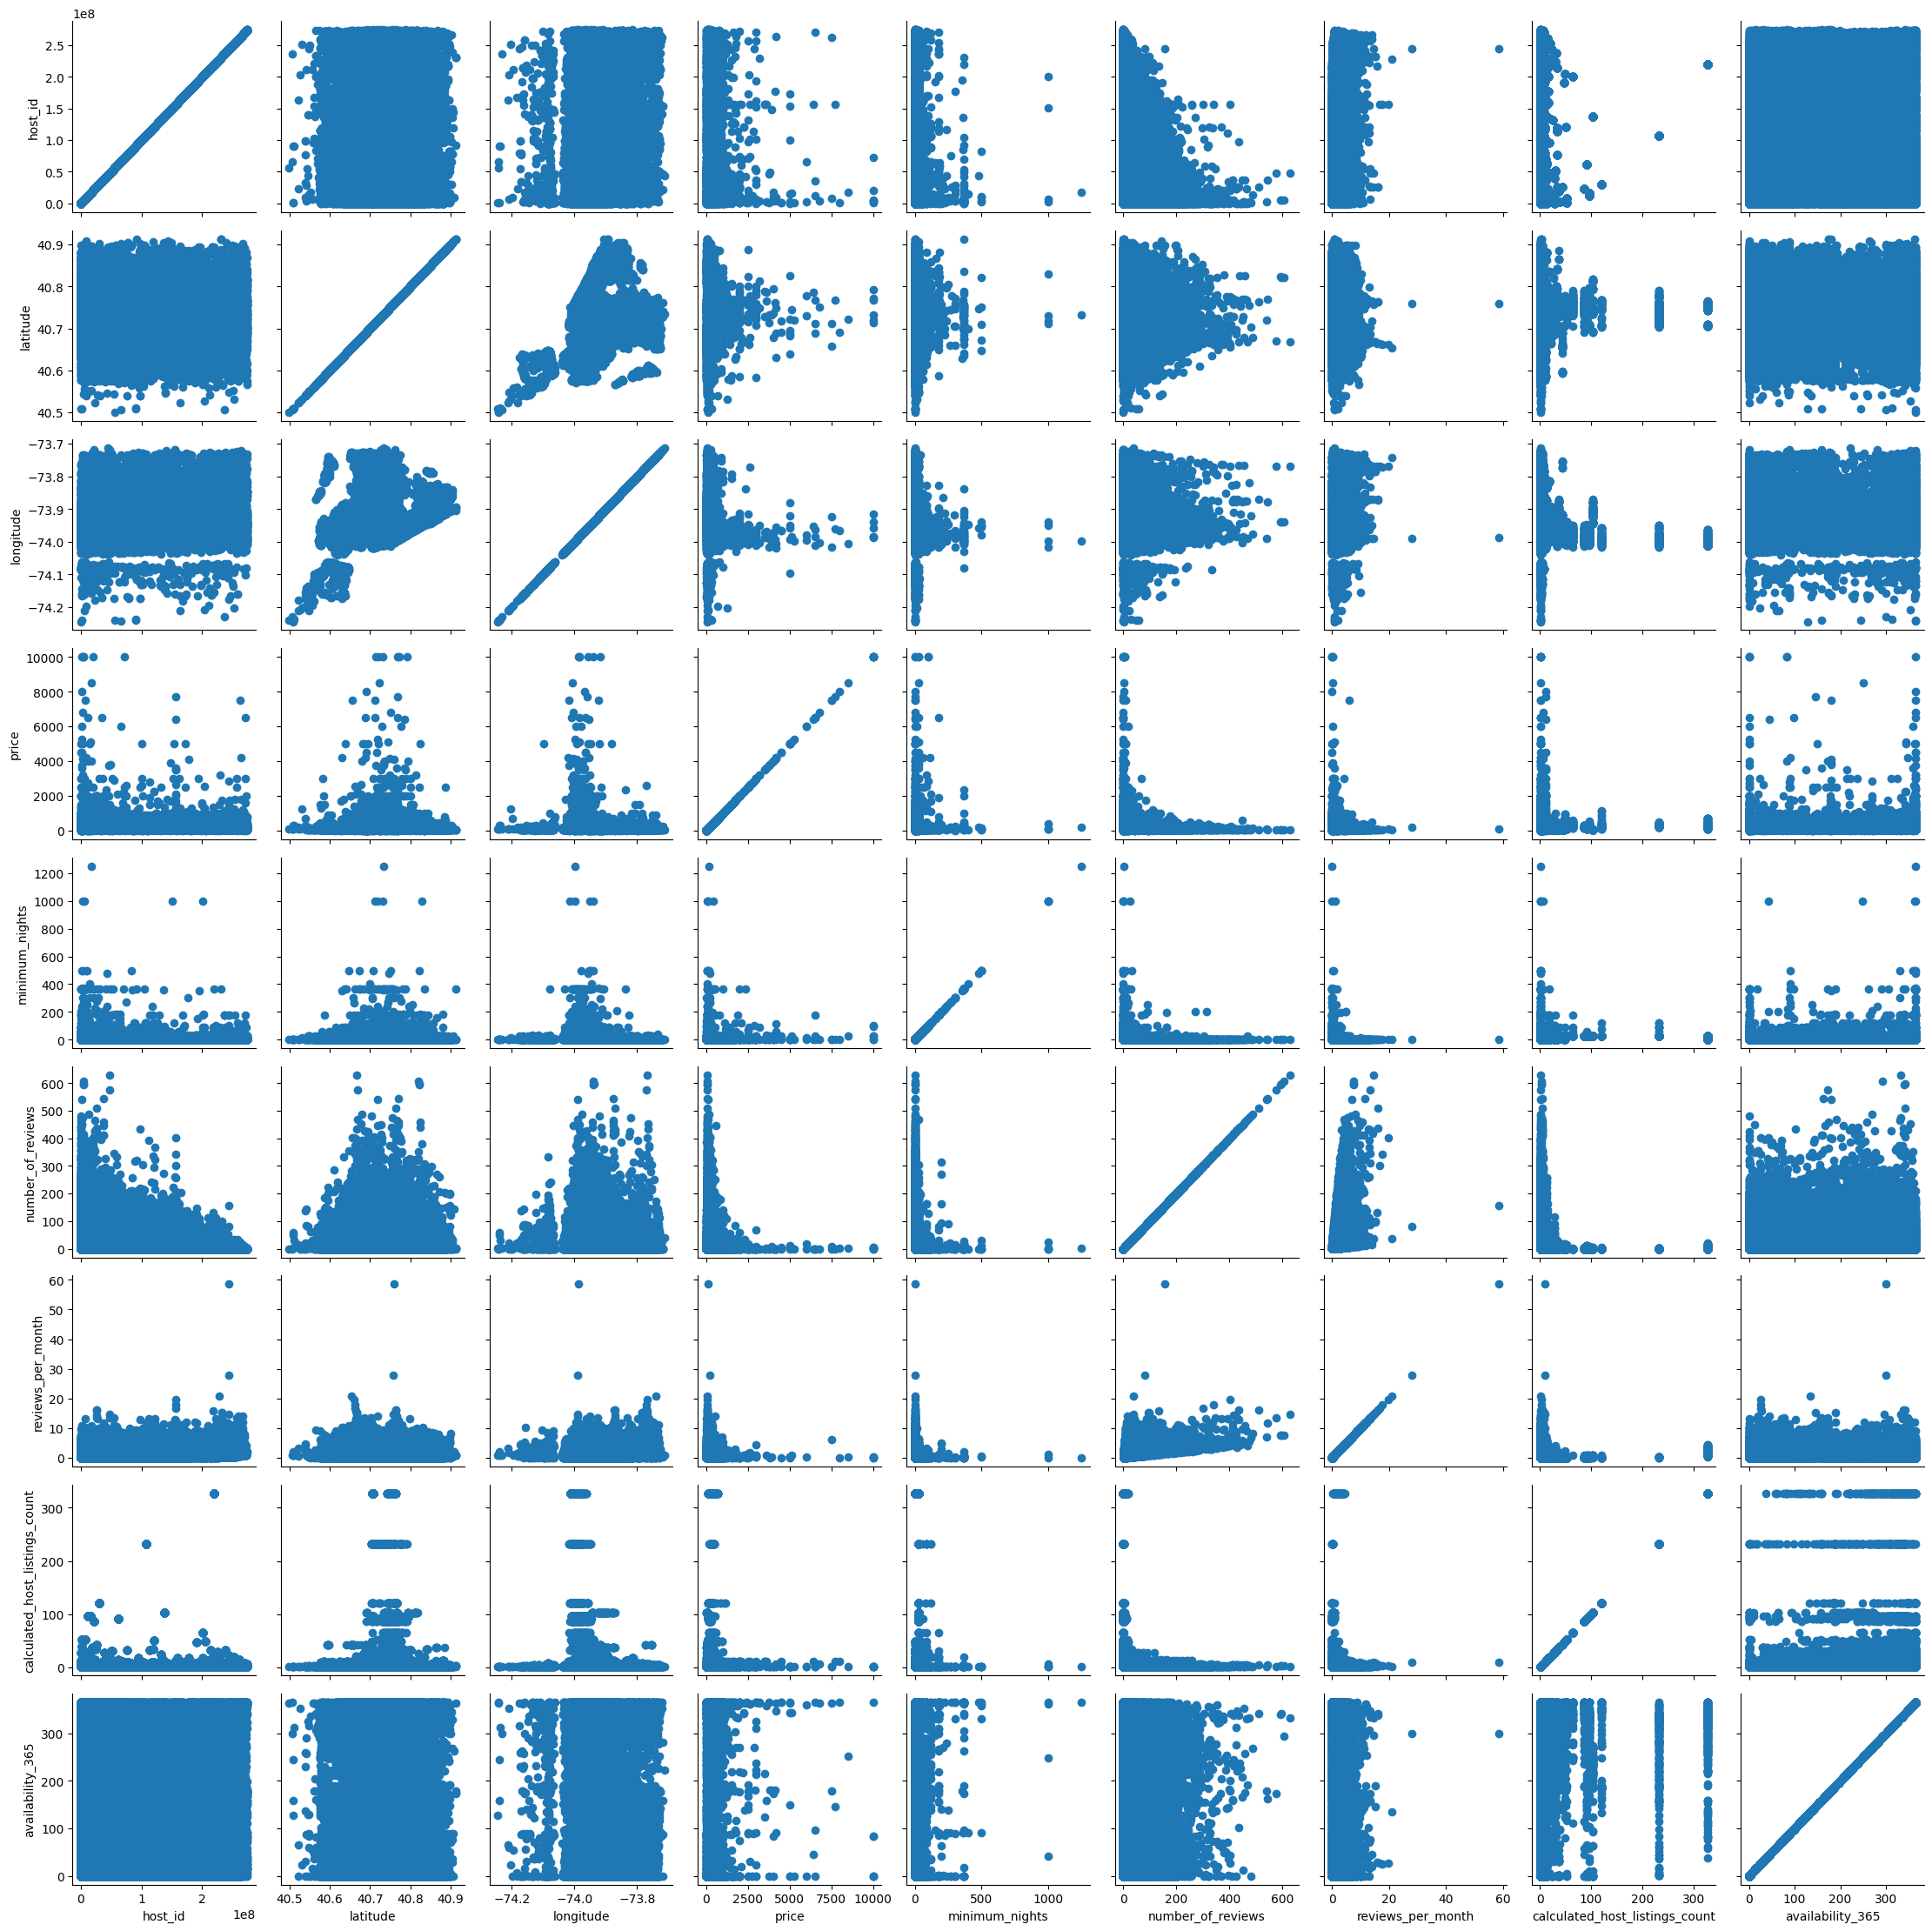

In [132]:
g=sns.PairGrid(df)
g.map(plt.scatter)

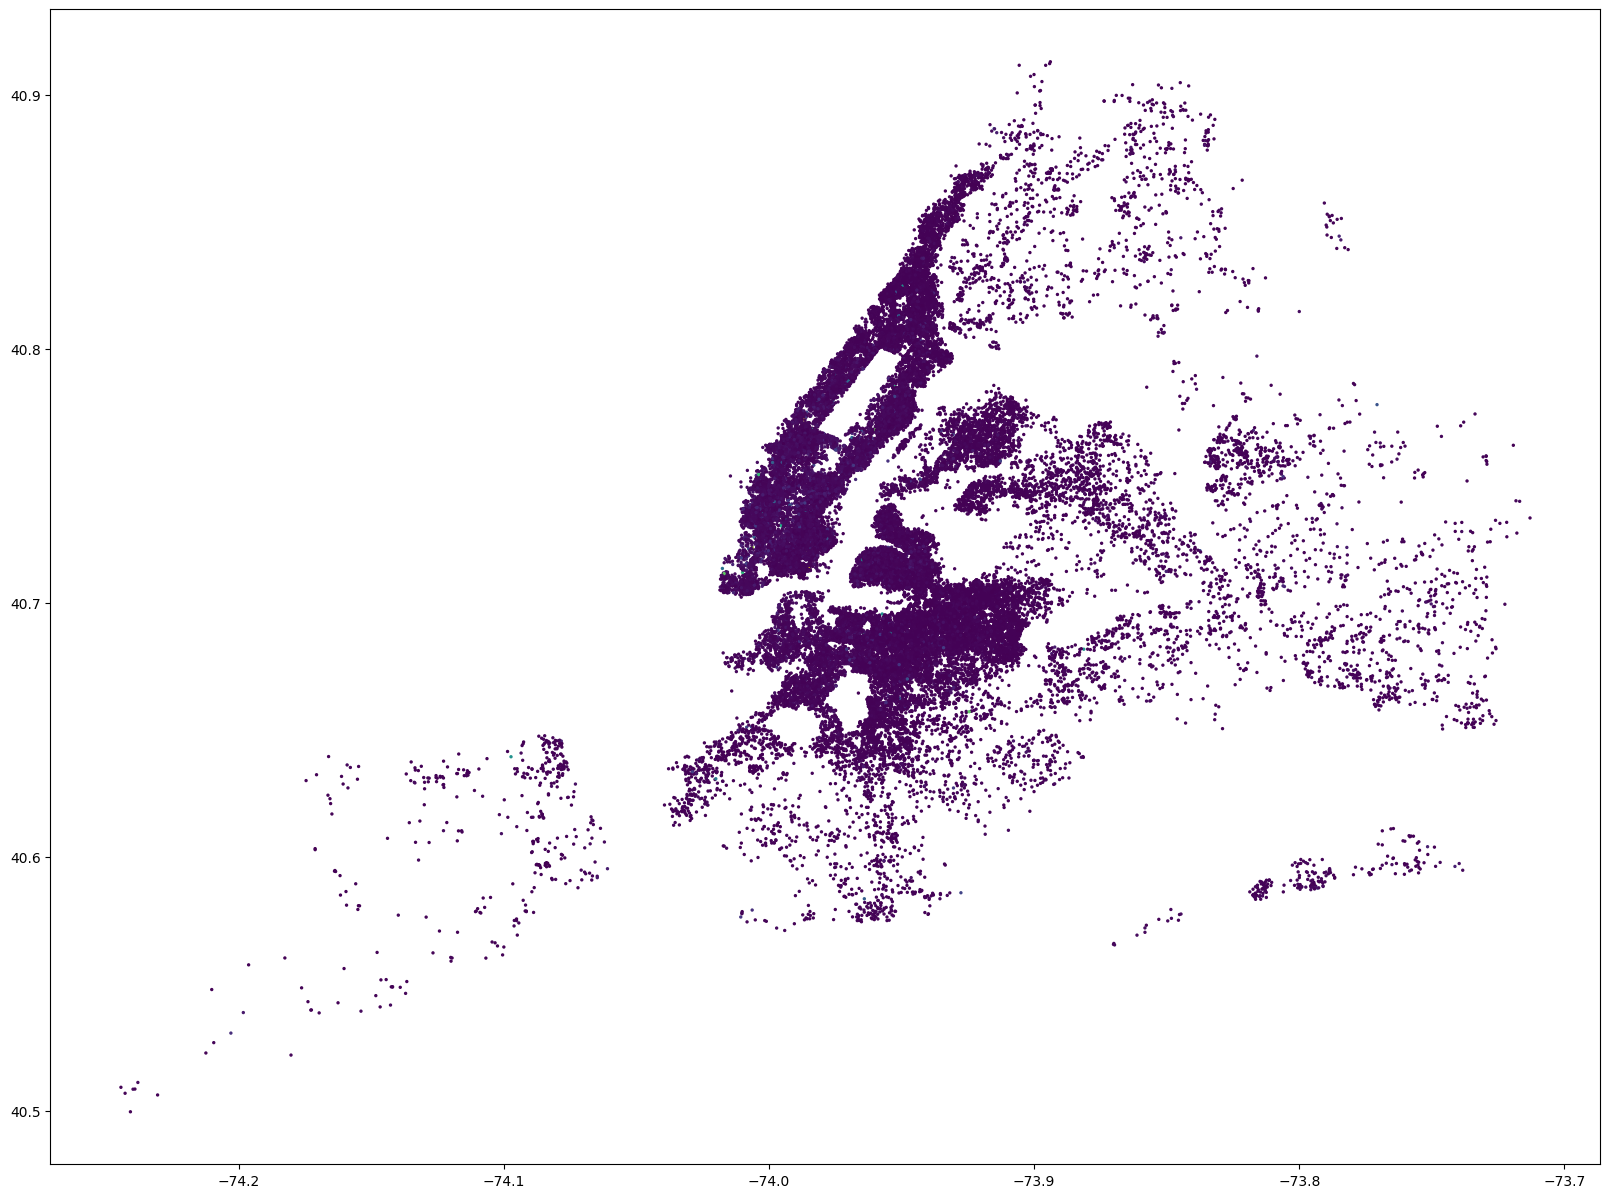

In [133]:
plt.figure(figsize=(20,15))
plt.scatter(df['longitude'],df['latitude'], c=df['price'], s=2) # s is a size of marker, cmap options 
plt.show()

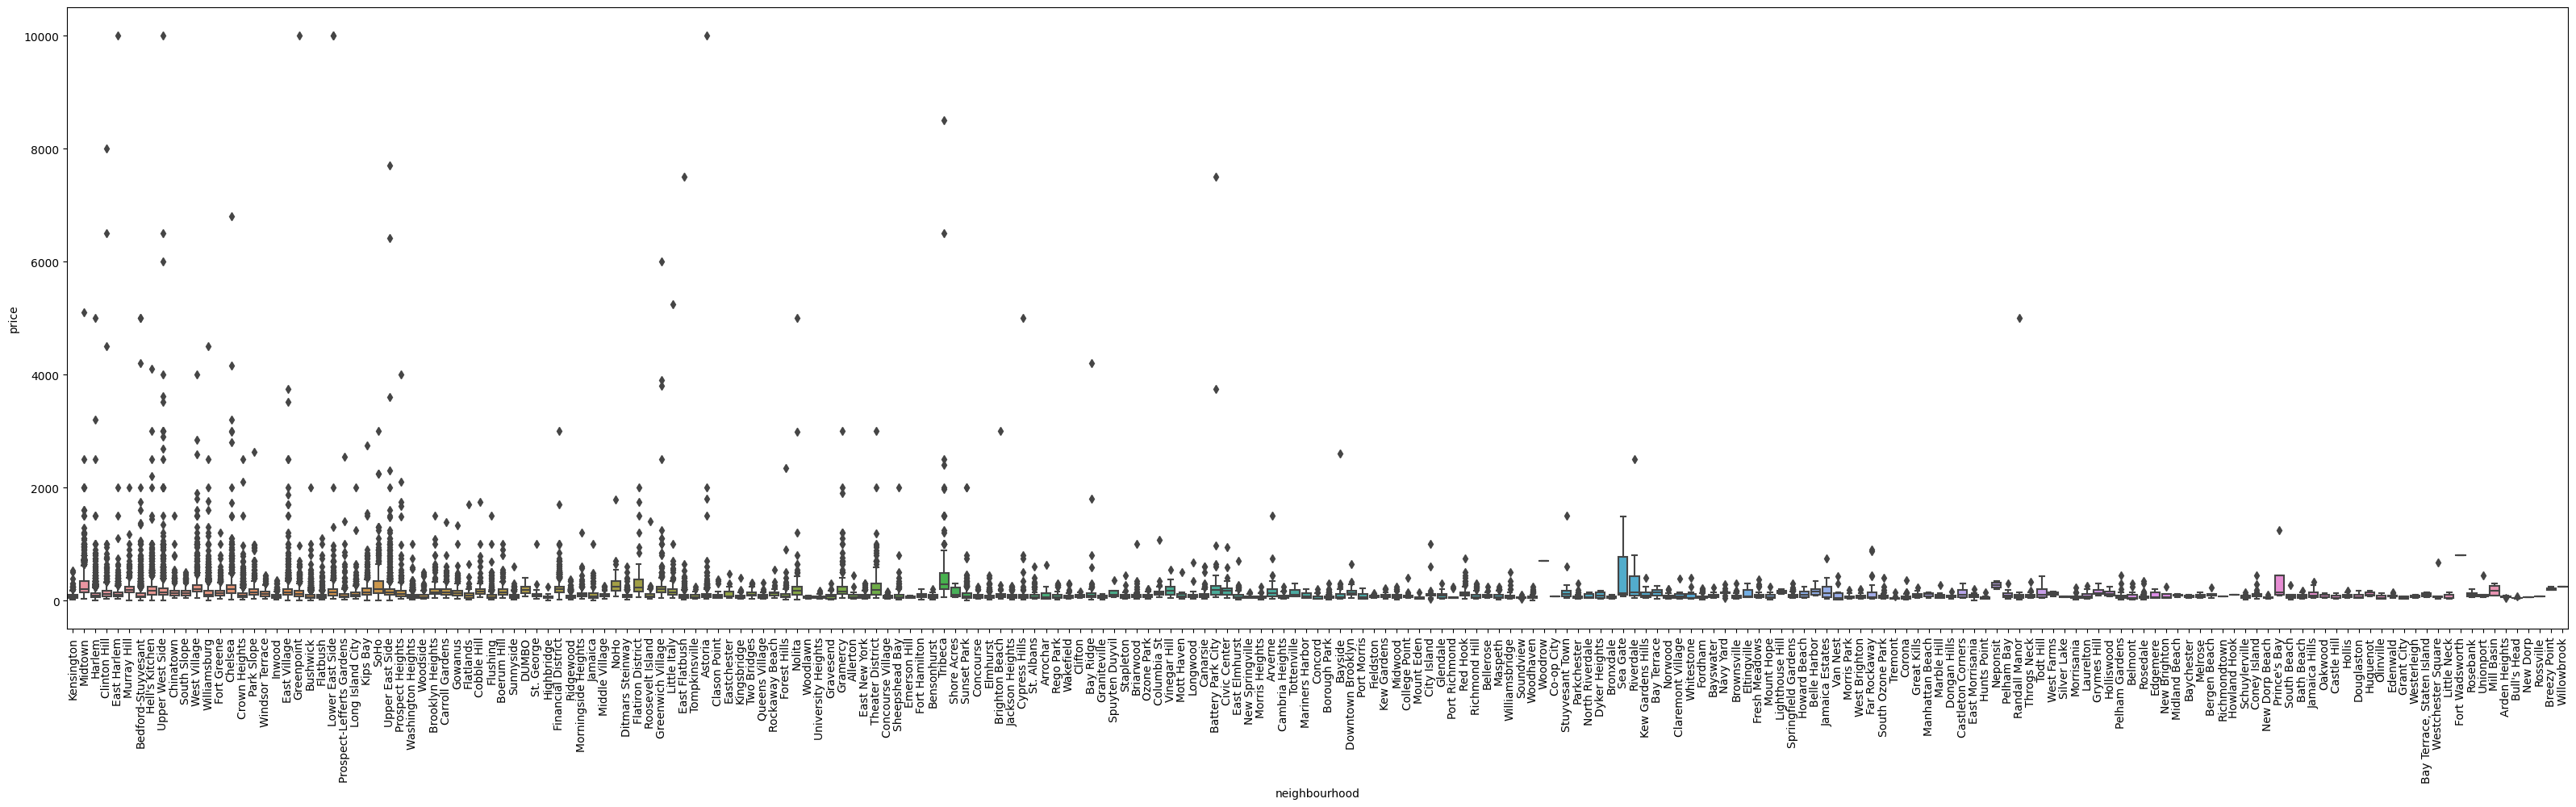

In [134]:
plt.figure(figsize=(40,10))
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

In [135]:
private_rooms = df[df['room_type'] == 'Private room']
neighborhood_prices = private_rooms.groupby([ 'neighbourhood', 'neighbourhood_group'])['price'].mean().reset_index()
neighborhood_prices = neighborhood_prices.sort_values('price', ascending = False)
neighborhood_prices

,neighbourhood,neighbourhood_group,price
158,Riverdale,Bronx,803.500000
122,Midtown,Manhattan,244.428910
102,Jamaica Estates,Queens,223.000000
20,Breezy Point,Queens,213.333333
199,West Village,Manhattan,205.651786
...,...,...,...
134,New Dorp Beach,Staten Island,38.666667
31,Castle Hill,Bronx,38.600000
193,Van Nest,Bronx,36.666667
86,Grant City,Staten Island,29.500000


In [136]:
from wordcloud import WordCloud

private_rooms = df[df['room_type'] == 'Private room']
neighborhood_prices = private_rooms.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()

neighborhood_dict = dict(zip(neighborhood_prices.neighbourhood, neighborhood_prices.price))



wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='summer', max_font_size=150).generate_from_frequencies(neighborhood_dict)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on Mean price per neighbourhood')
plt.show()




ModuleNotFoundError: No module named 'wordcloud'

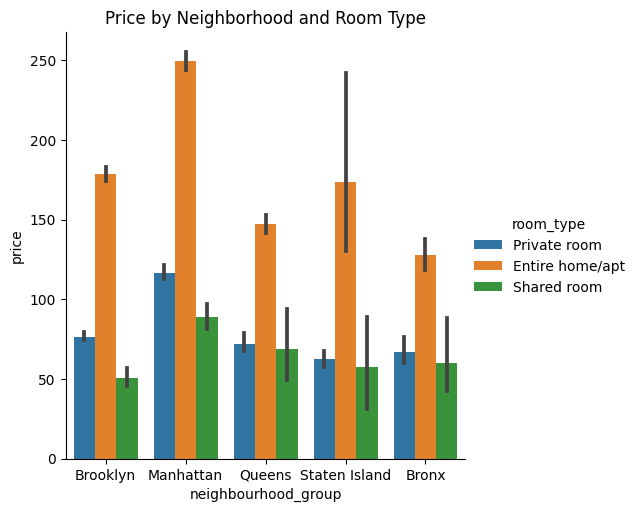

In [137]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="bar", data=df)
plt.title("Price by Neighborhood and Room Type")
plt.show()

In [7]:
plt.figure(figsize=(12, 8))
grouped_df = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
sns.catplot(x="neighbourhood", y="price", hue="neighbourhood_group", kind="bar", data=grouped_df, height=5, aspect=5)
plt.title("Mean price per neighborhood and neighborhood group")
plt.xticks(rotation=90)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

Possbile Forecasts:

Predict the rental price based on other features such as the neighborhood, room type, and availability

Predict the occupancy rate  based on other features such as neighborhood, and room type

Predict popular neighborhoods based on historical data

1- Ignore The zero proces

2- Do label encoding and one-hot encoding for neighborhood group and compare them

3- Do label necoding for neighborhood 

3- use linear regression and descision tree for prediction



In [14]:
#Since the zero prices are not important for us and we want to predcit price for our dataset and these zero prices have a negative effect on the performance of out model we ignore them.
df = df.drop(df[df['price'] == 0].index)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,92.885714,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,282.719094,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,118.974041,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,181.893357,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,133.198747,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,107.794340,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,84.903737,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,118.974041,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,204.794178,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [ ]:
# #I want to use ordinal encoding to convert neighbourhood and I assign the median of each group
# #as the number for neighborhood
# neighborhood_median_prices = df.groupby('neighbourhood')['price'].median()
# neighborhood_median_prices

neighbourhood
Allerton            66.5
Arden Heights       72.5
Arrochar            65.0
Arverne            125.0
Astoria             85.0
                   ...  
Windsor Terrace    123.0
Woodhaven           52.0
Woodlawn            68.0
Woodrow            700.0
Woodside            60.0
Name: price, Length: 221, dtype: float64

In [ ]:

# sorted_neighborhoods = neighborhood_median_prices.sort_values().index.tolist()
# ordinal_encoding = {neighborhood: rank+1 for rank, neighborhood in enumerate(sorted_neighborhoods)}
# df['neighborhood_ordinal'] = df['neighbourhood'].map(ordinal_encoding)


# df['neighbourhood']
# print(len(df.neighborhood_ordinal.unique()))
# print(len(df.neighbourhood.unique()))

221
221


In [ ]:
#Hopefully the encoding using median generates unique vlaues for all nighbourhoods!

In [ ]:
# data = pd.get_dummies(df, columns=['neighbourhood_group'], prefix=['ng'])

# print(data.head())

   host_id neighbourhood  latitude  longitude        room_type  price  \
0     2787    Kensington  40.64749  -73.97237     Private room    149   
1     2845       Midtown  40.75362  -73.98377  Entire home/apt    225   
2     4632        Harlem  40.80902  -73.94190     Private room    150   
3     4869  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   
4     7192   East Harlem  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  neighborhood_ordinal  \
0                               6               365                    73   
1                               2               355 

In [ ]:
# data = pd.get_dummies(df, columns=['room_type'], prefix=['rt'])

# print(data.head())

   host_id neighbourhood_group neighbourhood  latitude  longitude  price  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237    149   
1     2845           Manhattan       Midtown  40.75362  -73.98377    225   
2     4632           Manhattan        Harlem  40.80902  -73.94190    150   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976     89   
4     7192           Manhattan   East Harlem  40.79851  -73.94399     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  neighborhood_ordinal  \
0                               6               365                    73   
1                               2 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


dataset = df.copy()

neighbourhood_means = dataset.groupby('neighbourhood')['price'].mean()
dataset['neighbourhood'] = dataset['neighbourhood'].map(neighbourhood_means)
X = dataset[['room_type', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude']]
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['room_type', 'neighbourhood_group']),
    remainder='passthrough'
)

X_train_transformed = column_transformer.fit_transform(X_train)

X_test_transformed = column_transformer.transform(X_test)


model = LinearRegression()
model.fit(X_train_transformed, y_train)


score = model.score(X_test_transformed, y_test)
print("R^2 Score: {:.2f}".format(score))

# # Predict the price for a new listing with the following features
# new_listing = [['Entire home/apt', 'Manhattan', 500]]
# new_listing_transformed = column_transformer.transform(new_listing)
# predicted_price = model.predict(new_listing_transformed)

# # Print the predicted price
# print("Predicted price for new listing: ${:.2f}".format(predicted_price[0]))


R^2 Score: 0.13


c:\Users\panaham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

dataset = df.copy()


neighbourhood_means = dataset.groupby('neighbourhood')['price'].mean()
dataset['neighbourhood'] = dataset['neighbourhood'].map(neighbourhood_means)
X = dataset[['room_type', 'neighbourhood_group', 'neighbourhood']]
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['room_type', 'neighbourhood_group']),
    remainder='passthrough'
)

X_train_transformed = column_transformer.fit_transform(X_train)

X_test_transformed = column_transformer.transform(X_test)


model = LinearRegression()
model.fit(X_train_transformed, y_train)


score = model.score(X_test_transformed, y_test)
print("R^2 Score: {:.2f}".format(score))


R^2 Score: 0.13


c:\Users\panaham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv('AB_NYC_2019.csv')
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

data = df.copy()

# Define categorical feature columns
cat_cols = ["room_type", "neighbourhood_group", "neighbourhood"]

# Create one-hot encoder for categorical features
encoder = OneHotEncoder()
transformer = ColumnTransformer(
    transformers=[("cat", encoder, cat_cols)],
    remainder="passthrough"
)








In [79]:
data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [74]:
# Transform data using one-hot encoder
encoded_cols = transformer.fit_transform(data)
feature_names = transformer.get_feature_names_out()


In [80]:
print(feature_names)

['cat__room_type_Entire home/apt' 'cat__room_type_Private room'
 'cat__room_type_Shared room' 'cat__neighbourhood_group_Bronx'
 'cat__neighbourhood_group_Brooklyn' 'cat__neighbourhood_group_Manhattan'
 'cat__neighbourhood_group_Queens'
 'cat__neighbourhood_group_Staten Island' 'cat__neighbourhood_Allerton'
 'cat__neighbourhood_Arden Heights' 'cat__neighbourhood_Arrochar'
 'cat__neighbourhood_Arverne' 'cat__neighbourhood_Astoria'
 'cat__neighbourhood_Bath Beach' 'cat__neighbourhood_Battery Park City'
 'cat__neighbourhood_Bay Ridge' 'cat__neighbourhood_Bay Terrace'
 'cat__neighbourhood_Bay Terrace, Staten Island'
 'cat__neighbourhood_Baychester' 'cat__neighbourhood_Bayside'
 'cat__neighbourhood_Bayswater' 'cat__neighbourhood_Bedford-Stuyvesant'
 'cat__neighbourhood_Belle Harbor' 'cat__neighbourhood_Bellerose'
 'cat__neighbourhood_Belmont' 'cat__neighbourhood_Bensonhurst'
 'cat__neighbourhood_Bergen Beach' 'cat__neighbourhood_Boerum Hill'
 'cat__neighbourhood_Borough Park' 'cat__neighbour

In [75]:
dataset = pd.DataFrame(encoded_cols, columns=feature_names)

ValueError: Shape of passed values is (48895, 1), indices imply (48895, 238)

In [ ]:
# Split data into training and test sets
X = dataset['price']
y = dataset[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print R-squared score for training and test sets
print("Training set R-squared:", model.score(X_train, y_train))
print("Test set R-squared:", model.score(X_test, y_test))

In [61]:
X_train

,room_type,neighbourhood_group,neighbourhood
21681,Entire home/apt,Queens,Cambria Heights
26482,Entire home/apt,Brooklyn,Sunset Park
20859,Private room,Manhattan,Kips Bay
45464,Private room,Brooklyn,Bedford-Stuyvesant
22583,Shared room,Manhattan,Midtown
...,...,...,...
11284,Shared room,Manhattan,Washington Heights
44732,Private room,Manhattan,Chelsea
38158,Entire home/apt,Manhattan,Upper West Side
860,Entire home/apt,Manhattan,Upper West Side
